# Data Preparing & Processing

## Importing Libraries

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [155]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
## Initialising Dataset
train_samples = []
train_labels = []

## Data Creation

We will be creating our own data set.

Hypothetical an experimental drug was tested on individuals ranging from age 18 to 80 in a clinical trial. The trial had 4000 participants. 60% of the participants were under 50 years old, and the others were above 50 years.

The trial showed that around 85% of patients 65 or older experienced side effects from the drug, and around 90% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

We want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age.

In [130]:
#Unaffected young population
for i in range(int(4000*0.6*0.9)):
    train_samples.append(randint(18,50))
    train_labels.append(0)
    
#Affected young population
for i in range(int(4000*0.6*0.1)):
    train_samples.append(randint(18,50))
    train_labels.append(1)

#Affected old population
for i in range(int(4000*0.4*0.85)):
    train_samples.append(randint(50,75))
    train_labels.append(1)
    
#Unaffected old population
for i in range(int(4000*0.4*0.15)):
    train_samples.append(randint(50,75))
    train_labels.append(0)

In [131]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

### Shuffling data to remove any order during data creation

In [132]:
train_samples, train_labels = shuffle(train_samples, train_labels, random_state = 10)

### Scaling Data

In [133]:
scaler = MinMaxScaler(feature_range=(0,1))

In [134]:
train_samples_scaled = scaler.fit_transform(train_samples.reshape(-1,1))
train_samples_scaled

array([[0.31578947],
       [0.14035088],
       [0.10526316],
       ...,
       [0.29824561],
       [0.89473684],
       [0.29824561]])

### Device Check: CPU & GPU

In [135]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

### For running in GPU

physical_devices = tf.config.experimental.list_physical_devices('GPU')

print("Num GPUs Available: ", len(physical_devices))

tf.config.experimental.set_memory_growth(physical_devices[0], True)

### ANN Model creation

In [136]:
model = Sequential([
    Dense(units = 16, input_shape = (1,), activation ='relu'),
    Dense(units = 32, activation ='relu'),
    Dense(units = 2, activation ='softmax')
])

In [137]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_69 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### Training ANN Model

In [138]:
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [139]:
model.fit(x= train_samples_scaled[:3601], 
          y= train_labels[:3601], 
          epochs = 25,
          validation_split=0.1,
          batch_size = 15, 
          shuffle=True, 
          verbose = 2)

Epoch 1/25
216/216 - 0s - loss: 0.6890 - accuracy: 0.6157 - val_loss: 0.6817 - val_accuracy: 0.6842
Epoch 2/25
216/216 - 0s - loss: 0.6743 - accuracy: 0.7787 - val_loss: 0.6681 - val_accuracy: 0.8116
Epoch 3/25
216/216 - 0s - loss: 0.6584 - accuracy: 0.8614 - val_loss: 0.6528 - val_accuracy: 0.8449
Epoch 4/25
216/216 - 0s - loss: 0.6407 - accuracy: 0.8599 - val_loss: 0.6359 - val_accuracy: 0.8476
Epoch 5/25
216/216 - 0s - loss: 0.6210 - accuracy: 0.8586 - val_loss: 0.6173 - val_accuracy: 0.8449
Epoch 6/25
216/216 - 0s - loss: 0.5998 - accuracy: 0.8515 - val_loss: 0.5976 - val_accuracy: 0.8449
Epoch 7/25
216/216 - 0s - loss: 0.5777 - accuracy: 0.8460 - val_loss: 0.5775 - val_accuracy: 0.8476
Epoch 8/25
216/216 - 0s - loss: 0.5561 - accuracy: 0.8667 - val_loss: 0.5585 - val_accuracy: 0.8476
Epoch 9/25
216/216 - 0s - loss: 0.5352 - accuracy: 0.8648 - val_loss: 0.5405 - val_accuracy: 0.8476
Epoch 10/25
216/216 - 0s - loss: 0.5156 - accuracy: 0.8698 - val_loss: 0.5240 - val_accuracy: 0.8476

### ANN Model Predictions

In [144]:
predictions = model.predict(train_samples_scaled[3601:])

In [149]:
predict = np.argmax(predictions, axis = -1)
predict

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

### Confusion matrix

In [150]:
cm = confusion_matrix(y_true = train_labels[3601:],
                     y_pred = predict)

<AxesSubplot:>

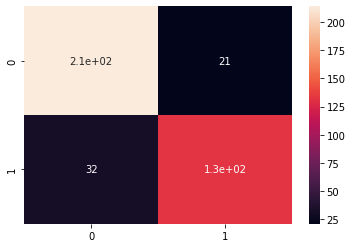

In [151]:
sns.heatmap(cm, annot=True)

In [156]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [157]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[214  21]
 [ 32 132]]


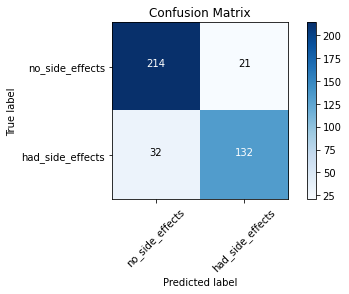

In [158]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

### Saving Model

In [162]:
import os.path
if os.path.isfile('medical_trial_model.h5') is False:
    model.save('medical_trial_model.h5')

### Loading Model

In [163]:
from tensorflow.keras.models import load_model

In [164]:
new_model = load_model('medical_trial_model.h5')
new_model

In [165]:
new_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_69 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_70 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [166]:
new_model.weights

[<tf.Variable 'dense_68/kernel:0' shape=(1, 16) dtype=float32, numpy=
 array([[-0.04832333,  0.33401257,  0.48139626, -0.5505654 , -0.3442818 ,
         -0.10689732,  0.26356652,  0.6180371 ,  0.6171073 ,  0.3057858 ,
          0.32311723, -0.1783567 , -0.3345493 , -0.36795184, -0.21546444,
         -0.3102338 ]], dtype=float32)>,
 <tf.Variable 'dense_68/bias:0' shape=(16,) dtype=float32, numpy=
 array([ 0.        , -0.06594667, -0.13038078,  0.        ,  0.        ,
         0.        , -0.08268191, -0.11123779, -0.04104938, -0.09430768,
         0.24724591,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ], dtype=float32)>,
 <tf.Variable 'dense_69/kernel:0' shape=(16, 32) dtype=float32, numpy=
 array([[-0.115078  ,  0.2968398 ,  0.2889389 ,  0.32050636,  0.29175547,
         -0.20405868,  0.00854704,  0.3239403 ,  0.16677406, -0.02198294,
          0.07286483, -0.3278193 , -0.09296986,  0.01112449,  0.2292737 ,
          0.24668202,  0.34277692, -0.20776583, -0